In [1]:
import numpy as np
import pandas as pd
import seaborn as  sns
import string
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

For more on what this excerpt does, see my [CSC310 notes on Regression](https://rhodyprog4ds.github.io/BrownFall20/notes/2020-10-26.html#what-is-considered-a-good-r2-value)

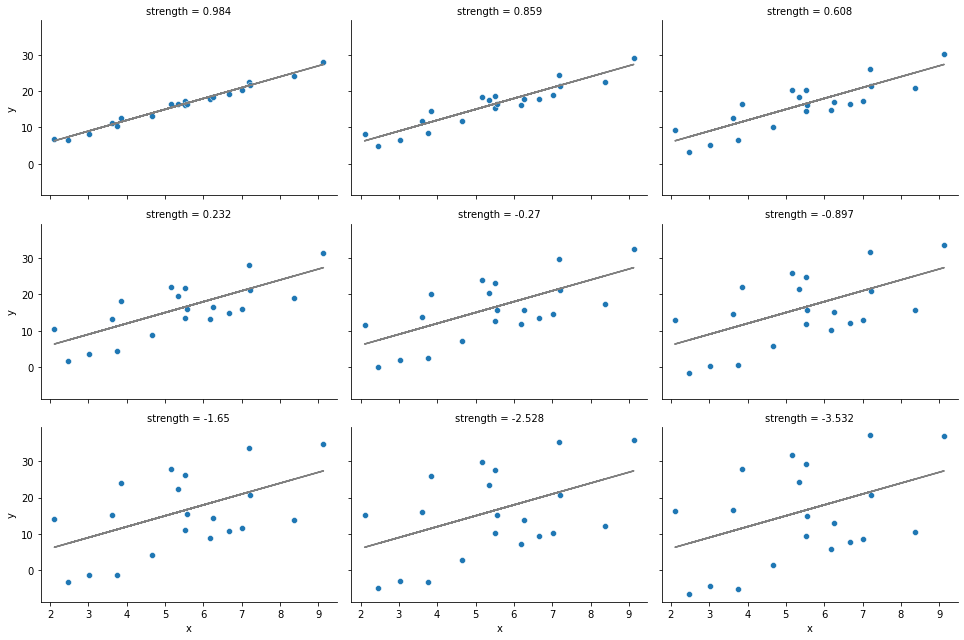

In [2]:
x = 10*np.random.random(20)
y_pred = 3*x
ex_df = pd.DataFrame(data = x,columns = ['x'])
ex_df['y_pred'] = y_pred
n_levels = range(1,18,2)
noise = (np.random.random(20)-.5)*2
for n in n_levels:
    y_true = y_pred + n* noise
    ex_df[str(np.round(r2_score(y_pred,y_true),3))] = y_true

xy_df = ex_df.melt(id_vars=['x','y_pred'],var_name='strength',value_name='y')
# sns.lmplot(x='x',y='y', data = xy_df,col='rscore',col_wrap=3,)
g = sns.FacetGrid(data = xy_df,col='strength',col_wrap=3,aspect=1.5,height=3)
g.map(plt.plot, 'x','y_pred',color='gray')
g.map(sns.scatterplot, "x", "y")

This grid above shows what data with various strengths looks like. 

# Simpson's paradox simple example

For finding a narrative, check the examples in [this article](https://www.frontiersin.org/articles/10.3389/fpsyg.2013.00513/full)

In [3]:
K = 3
m = 2
N = 30

b = np.linspace(0,2*(K-1),K)


In [4]:
df = pd.DataFrame(np.random.choice(K,N),columns=['g'])
df['group'] = [string.ascii_uppercase[gi] for gi in df['g']]
df['x'] = np.asarray([2*np.random.rand() + 8-b[gi] for gi in df['g']])
df['y'] = np.asarray([m*xi -18 + 3*b[gi] + .35*np.random.normal() for xi,gi in zip(df['x'],df['g'])])

df.head()

,g,group,x,y
0,2,C,4.468437,2.862405
1,2,C,4.658824,3.481410
2,0,A,9.166496,-0.248958
3,1,B,6.544855,1.730930
4,0,A,9.927904,1.396699


<AxesSubplot:xlabel='x', ylabel='y'>

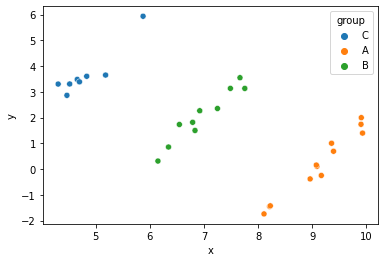

In [5]:
sns.scatterplot(data=df, x= 'x', y = 'y', hue='group')

Now use wiggum to calculate the trends in this dataset, it should be relatively strong trends and a large distance, use the linear regression trend.   (both strong, reversal)

<AxesSubplot:xlabel='x', ylabel='y'>

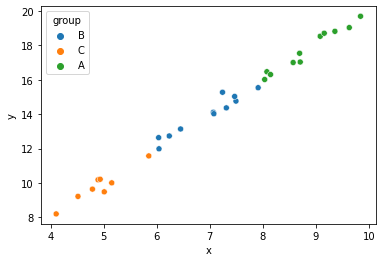

In [6]:
df = pd.DataFrame(np.random.choice(K,N),columns=['g'])
df['group'] = [string.ascii_uppercase[gi] for gi in df['g']]
df['x'] = np.asarray([2*np.random.rand() + 8-b[gi] for gi in df['g']])
df['y'] = np.asarray([m*xi + .35*np.random.normal() for xi,gi in zip(df['x'],df['g'])])

sns.scatterplot(data=df, x= 'x', y = 'y', hue='group')

this one should be strong trends and small distance (both strong, agreement)